# Pymaceuticals Inc.
---

### Analysis

- Capomulin treatment appears to effectively reduce tumor volume over different treatments. The plot of tumor volume vs. time for mouse I509 should show a decreasing trend, indicating that Capomulin is successful in controlling tumor growth. 
- The correlation coefficient and regression analysis shows that whether there is a significant relationship between mouse weight and tumor volume. A strong positive or negative correlation would suggest that mouse weight may influence tumor growth or that heavier/lighter mice tend to have different tumor volumes.
- This analysis show that a consistent decline in tumor volume with longer treatment times. The length of time that mice are treated with Capomulin influences tumor volume reduction and leads to a better outcomes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = combined_mouse_data["Mouse ID"]. nunique()
print(f"{number_of_mice}")

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_mouse_data[combined_mouse_data.duplicated(subset= ["Mouse ID","Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print(duplicate_mouse_ids)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_mouse_data.loc[combined_mouse_data["Mouse ID"]=='g989']
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = combined_mouse_data.loc[combined_mouse_data['Mouse ID']!= 'g989']
cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_cleaned = cleaned_mouse_data["Mouse ID"].nunique()
print(f"{number_of_mice_cleaned}")

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
groupby = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
mean = groupby.mean()
median = groupby.median()
variance = groupby.var()
std_dev = groupby.std()
sem = groupby.apply(lambda x: x.sem())

summary_stats = pd.DataFrame({
    'Mean Tumor Volume': mean,
    'Median Tumor Volume': median,
    'Tumor Volume Variance': variance,
    'Tumor Volume Std. Dev.': std_dev,
    'Tumor Volume Std. Err.': sem
})

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance=lambda x: x.var(),
    std_dev='std',
    sem=lambda x: x.sem(),
)
summary_stats.columns = ['mean', 
                        'median',
                        'var',
                        'std', 
                        'sem'
                       ]
df_summary_stats= pd.DataFrame(summary_stats)
df_summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

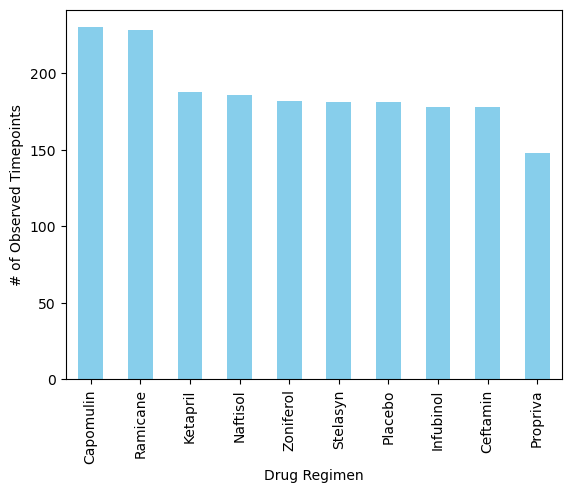

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts=cleaned_mouse_data['Drug Regimen'].value_counts()
df_counts=pd.DataFrame({'Drug Regimen': drug_regimen_counts.index,
                       '# of Observed Timepoints': drug_regimen_counts.values})
df_counts.set_index('Drug Regimen')['# of Observed Timepoints'].plot(kind='bar', color='skyblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.show()

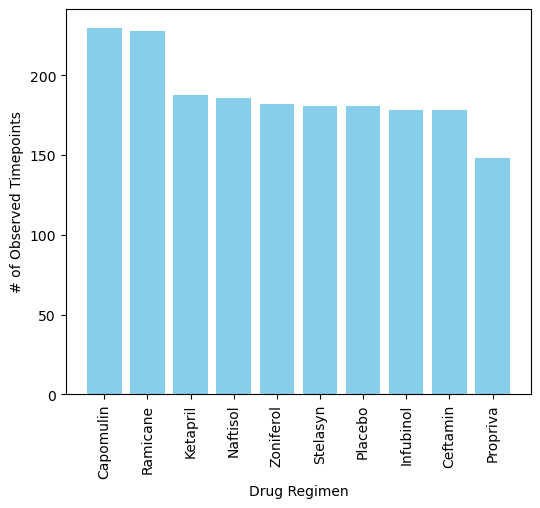

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts=cleaned_mouse_data['Drug Regimen'].value_counts()
plt.figure(figsize=(6, 5))
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Timepoints')
plt.xticks(rotation=90)

plt.show()

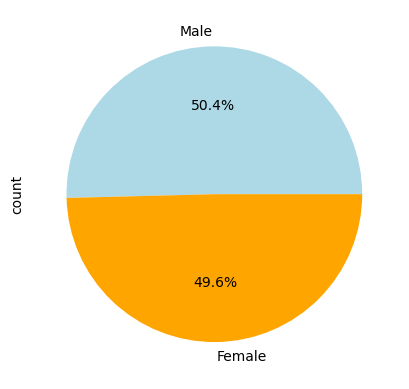

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = cleaned_mouse_data.drop_duplicates(subset=['Mouse ID'])
gender_counts = unique_mice['Sex'].value_counts()
# Make the pie chart
gender_counts.plot(kind='pie',autopct='%1.1f%%',colors=['lightblue', 'orange'],
                   labels=['Male','Female'])
plt.show()

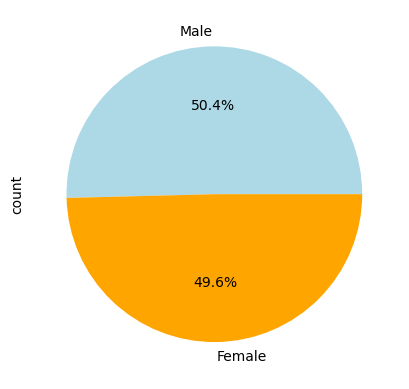

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart
colors = ['lightblue','orange']
labels = ['Male','Female']
explode = (0,0)
plt.pie(gender_counts,colors=colors,labels=labels,explode=explode,autopct="%1.1f%%")
plt.ylabel('count', fontsize=10)
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints=combined_mouse_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_tumor_volume= pd.merge(max_timepoints,cleaned_mouse_data, on=['Mouse ID','Timepoint'],how='left')
regimen_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume= combined_tumor_volume[combined_tumor_volume['Drug Regimen'].isin(regimen_list)]
final_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
6,a411,45,38.407618,1.0,Ramicane,Male,3.0,22.0
7,a444,45,43.047543,0.0,Ramicane,Female,10.0,25.0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_vol_data.append(treatment_data)

    # Determine outliers using upper and lower bounds
    quartiles = treatment_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


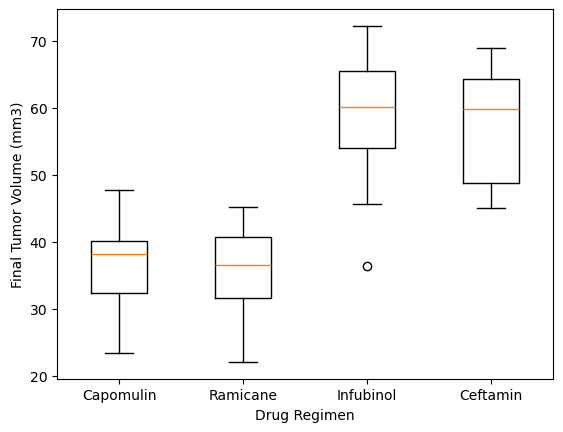

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = [final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
                  for treatment in treatment_list]
    
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatment_list)

ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

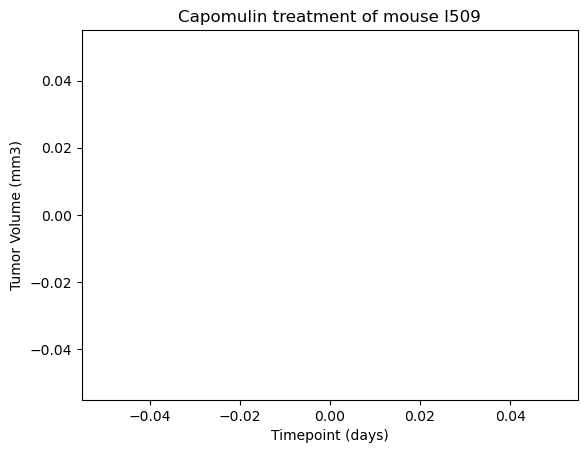

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'I509'
capomulin_mouse_data = final_tumor_volume[(final_tumor_volume['Drug Regimen'] == 'Capomulin') & 
                                          (final_tumor_volume['Mouse ID'] == mouse_id)]
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], color='blue', linestyle='-')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')
plt.show()


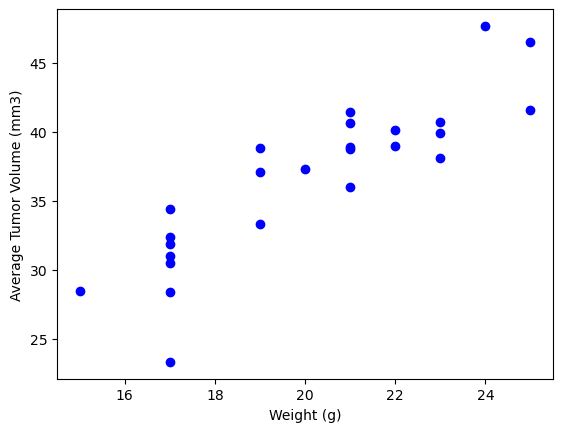

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = combined_tumor_volume[combined_tumor_volume['Drug Regimen'] == 'Capomulin']
avg_tumor_volume =capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_data = mouse_metadata[['Mouse ID', 'Weight (g)']]
merged_data = pd.merge(avg_tumor_volume, mouse_data, on='Mouse ID')
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


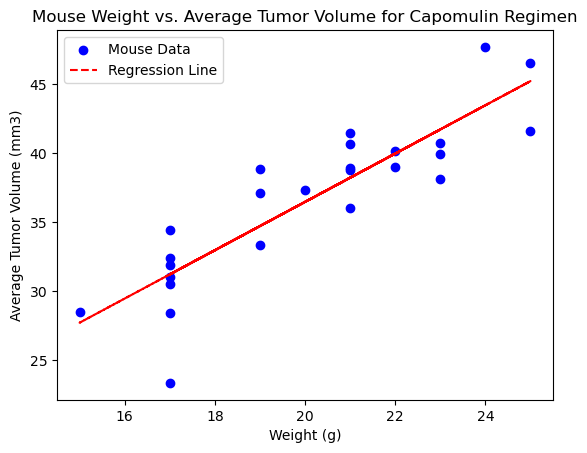

In [19]:
from scipy import stats
x_values = merged_data['Weight (g)']
y_values = merged_data['Tumor Volume (mm3)']

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
regression_line = slope * x_values + intercept

plt.scatter(x_values, y_values, color='blue', label='Mouse Data')
plt.plot(x_values, regression_line, color='red', linestyle='--', label='Regression Line')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()
plt.show()
